## Análisis - Premier League temporada 2015/2016 (masculina)

Vamos a hacer un análisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que características son más importantes a la hora de tomar la decisión por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuestión, vamos a analizar la Premier League en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competición para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "Premier League"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_PL = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/Premier League(2015_2016_male)_reduced.csv


In [2]:
matches_in_PL.head(5)

,match_id,shots_on_target_ratio_home,shots_on_target_ratio_away,average_shots_on_target_distance_home,average_shots_on_target_distance_away,shots_inside_area_ratio_home,shots_inside_area_ratio_away,pass_success_ratio_home,pass_success_ratio_away,cross_success_ratio_home,...,percentage_shots_under_pressure_home,percentage_shots_inside_area_under_pressure_home,percentage_passes_under_pressure_home,percentage_passes_inside_area_under_pressure_home,percentage_set_piece_shots_home,percentage_set_piece_shots_inside_area_home,percentage_substitutions_home,percentage_tactical_substitutions_home,percentage_tactical_changes_home,percentage_formation_changes_home
0,3754097,0.111111,0.555556,15.620819,17.725682,0.555556,0.777778,0.808824,0.777778,0.200000,...,0.200000,0.000000,0.403846,0.285714,0.400000,0.200000,0.5,0.5,0.5,0.5
1,3754112,0.300000,0.285714,10.397006,13.959668,0.700000,0.714286,0.773852,0.772834,0.250000,...,0.250000,0.333333,0.569620,0.666667,0.533333,0.500000,0.6,0.5,0.5,0.5
2,3754141,0.260870,0.500000,15.724369,21.563397,0.695652,0.500000,0.834983,0.713158,0.320000,...,0.875000,0.875000,0.567797,0.750000,0.642857,0.666667,0.4,0.4,1.0,0.5
3,3754237,0.421053,0.555556,16.690552,10.904830,0.789474,0.666667,0.711392,0.753012,0.357143,...,0.625000,0.625000,0.365672,0.428571,0.647059,0.666667,0.6,0.6,0.5,0.5
4,3754300,0.454545,0.454545,18.363562,21.955396,0.636364,0.363636,0.785714,0.680912,0.260870,...,0.714286,0.800000,0.645833,0.600000,0.615385,0.666667,0.5,0.5,0.5,0.5


Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentación) y mostramos sus resultados.

In [3]:
from src.analysis import premierleague_best_model


best_model_PL, evaluation_metrics, X_train_reduced_PL, X_test_reduced_PL, X_test_reduced_orig_PL, feature_names_reduced_PL, encoder_PL, match_ids_test = premierleague_best_model(matches_in_PL)
print(f"The best model for La Liga is {best_model_PL}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for La Liga is LogisticRegression(C=0.6261372210153997, l1_ratio=0.5193180715867101,
                   max_iter=1000, penalty='elasticnet', random_state=42,
                   solver='saga')
The evaluation metrics for the best model are:


,Train Accuracy,Test Accuracy,Precision Macro,Precision Weighted,Recall Macro,Recall Weighted,F1 Macro,F1 Weighted
Logistic Regression MI,0.753289,0.697368,0.689362,0.693582,0.678779,0.697368,0.681101,0.692363


Una vez ya tenemos el mejor modelo entrenado comenzamos el análisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Logistic Regression, vamos a fijarnos en el coeficiente (método coef_) que nos aporta el modelo para cada característica en cada clase. 
- Con esto, estamos observando la importancia global de cada característica para cada clase en términos de una relación lineal. Es decir, estamos observando relaciones exclusivamente lineales entre las características y la predicción.
- Con esto, no se tiene en cuenta las interacciones entre características ni tampoco explica predicciones individuales.

Los gráficos que se aparecen a continuación muestran la importancia de cada característica para predecir una determinada clase de resultado en los partidos de LaLiga. Las clases son:
- Clase "away_team": Indica qué características influyen en que el equipo visitante gane el partido.
- Clase "draw": Indica qué características influyen en que el partido termine en empate.
- Clase "home_team": Indica qué características influyen en que el equipo local gane el partido.

Los valores representados en el eje X son los coeficientes de la regresión logística, que indican la magnitud e impacto de cada variable en la probabilidad de un resultado específico. Valores positivos aumentan la probabilidad de que ocurra esa clase, mientras que valores negativos disminuyen dicha probabilidad.

Class 0: ['away_team']
Features with zero importance for class away_team:
['average_shots_on_target_distance_home', 'shots_inside_area_ratio_home', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'cross_success_ratio_home', 'dribbles_success_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_win_last_home_match_home_team', 'is_valid_win_last_away_match_away_team', 'difference_passes_needed_to_make_a_shot_home', 'percentage_blocks_home', 'percentage_tackles_home', 'percentage_yellow_cards_home', 'percentage_dribbles_home', 'percentage_players_off_home', 'percentage_recoveries_attacking_third_home', 'percentage_set_piece_shots_home', 'percentage_tactical_substitutions_home']


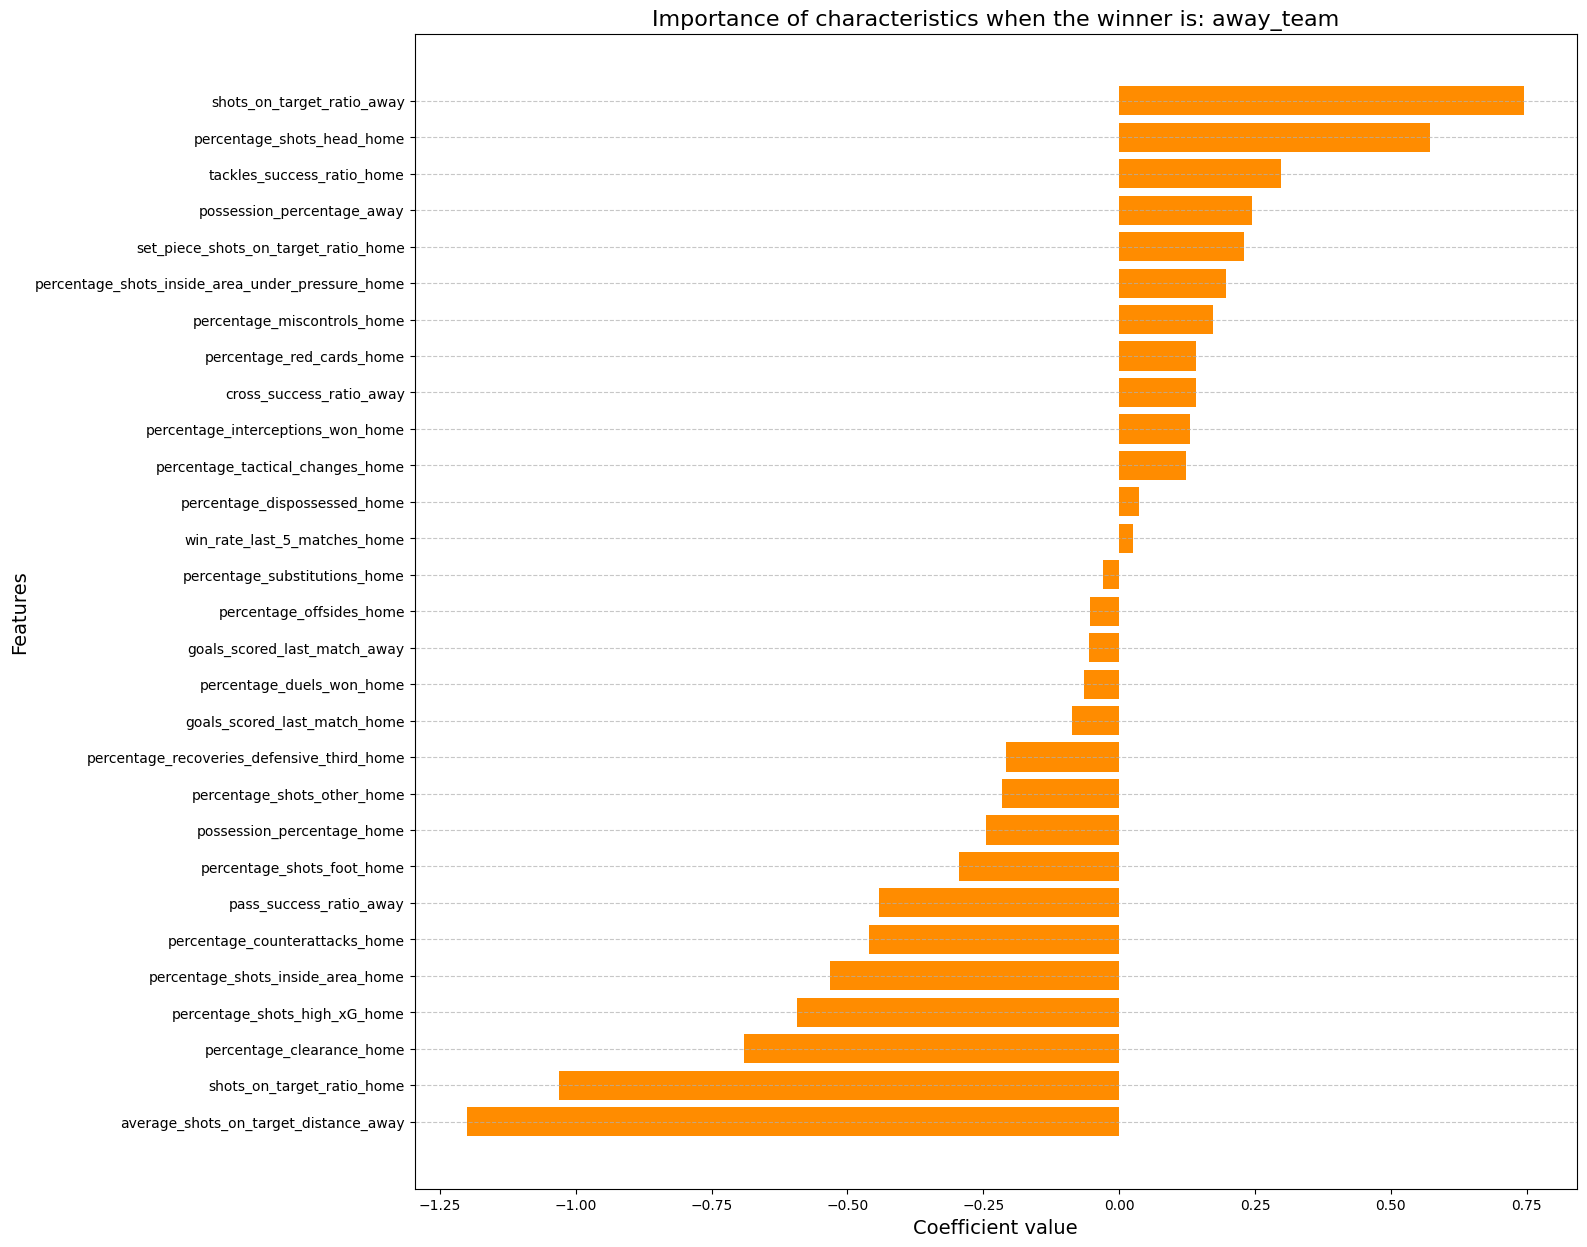

Class 1: ['draw']
Features with zero importance for class draw:
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'possession_percentage_home', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_home', 'win_rate_last_5_matches_home', 'goals_scored_last_match_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_shots_other_home', 'percentage_clearance_home', 'percentage_miscontrols_home', 'percentage_red_cards_home', 'percentage_dribbles_home', 'percentage_players_off_home', 'percentage_dispossessed_home', 'percentage_counterattacks_home', 'percentage_recoveries_defensive_third_home', 'percentage_shots_inside_area_under_pressure_home', 'percentage_substitutions_home', 'percentage_tactical_changes_home']


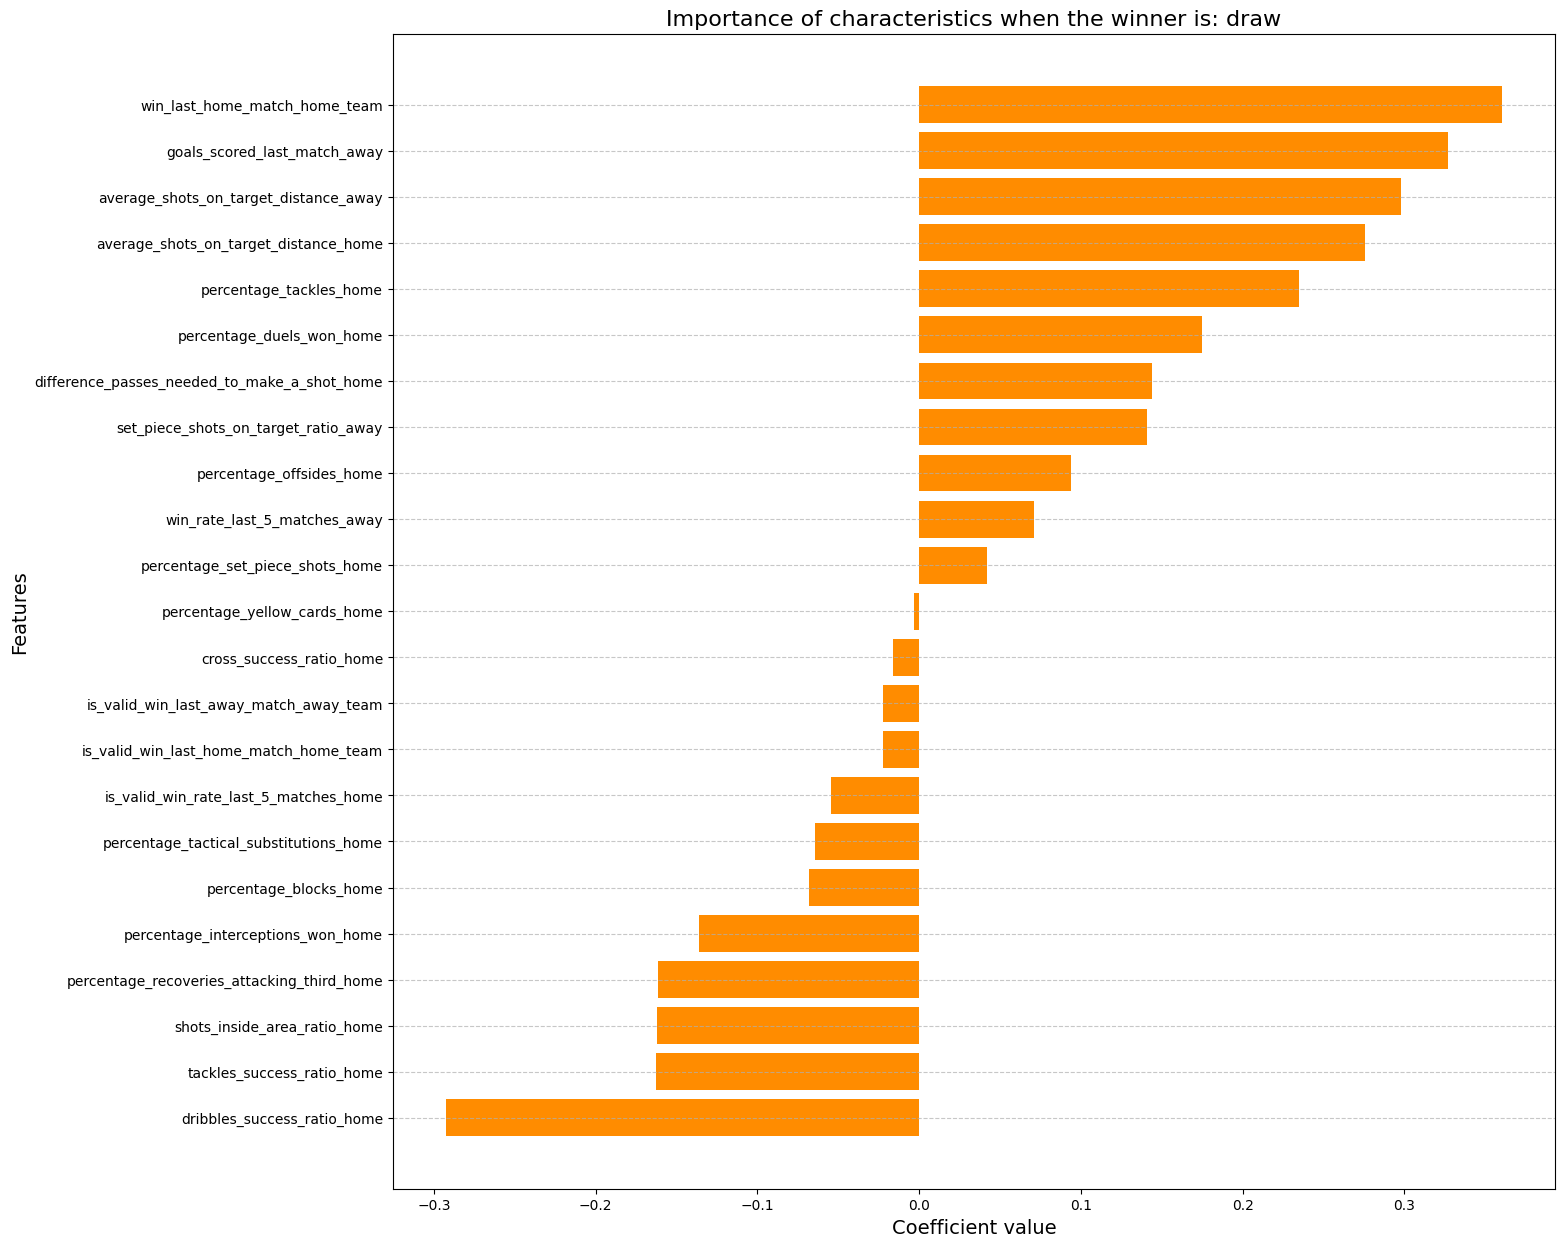

Class 2: ['home_team']
Features with zero importance for class home_team:
['average_shots_on_target_distance_away', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'cross_success_ratio_home', 'tackles_success_ratio_home', 'dribbles_success_ratio_home', 'win_rate_last_5_matches_home', 'is_valid_win_last_home_match_home_team', 'is_valid_win_last_away_match_away_team', 'goals_scored_last_match_away', 'percentage_interceptions_won_home', 'percentage_duels_won_home', 'percentage_offsides_home', 'percentage_players_off_home', 'percentage_recoveries_defensive_third_home']


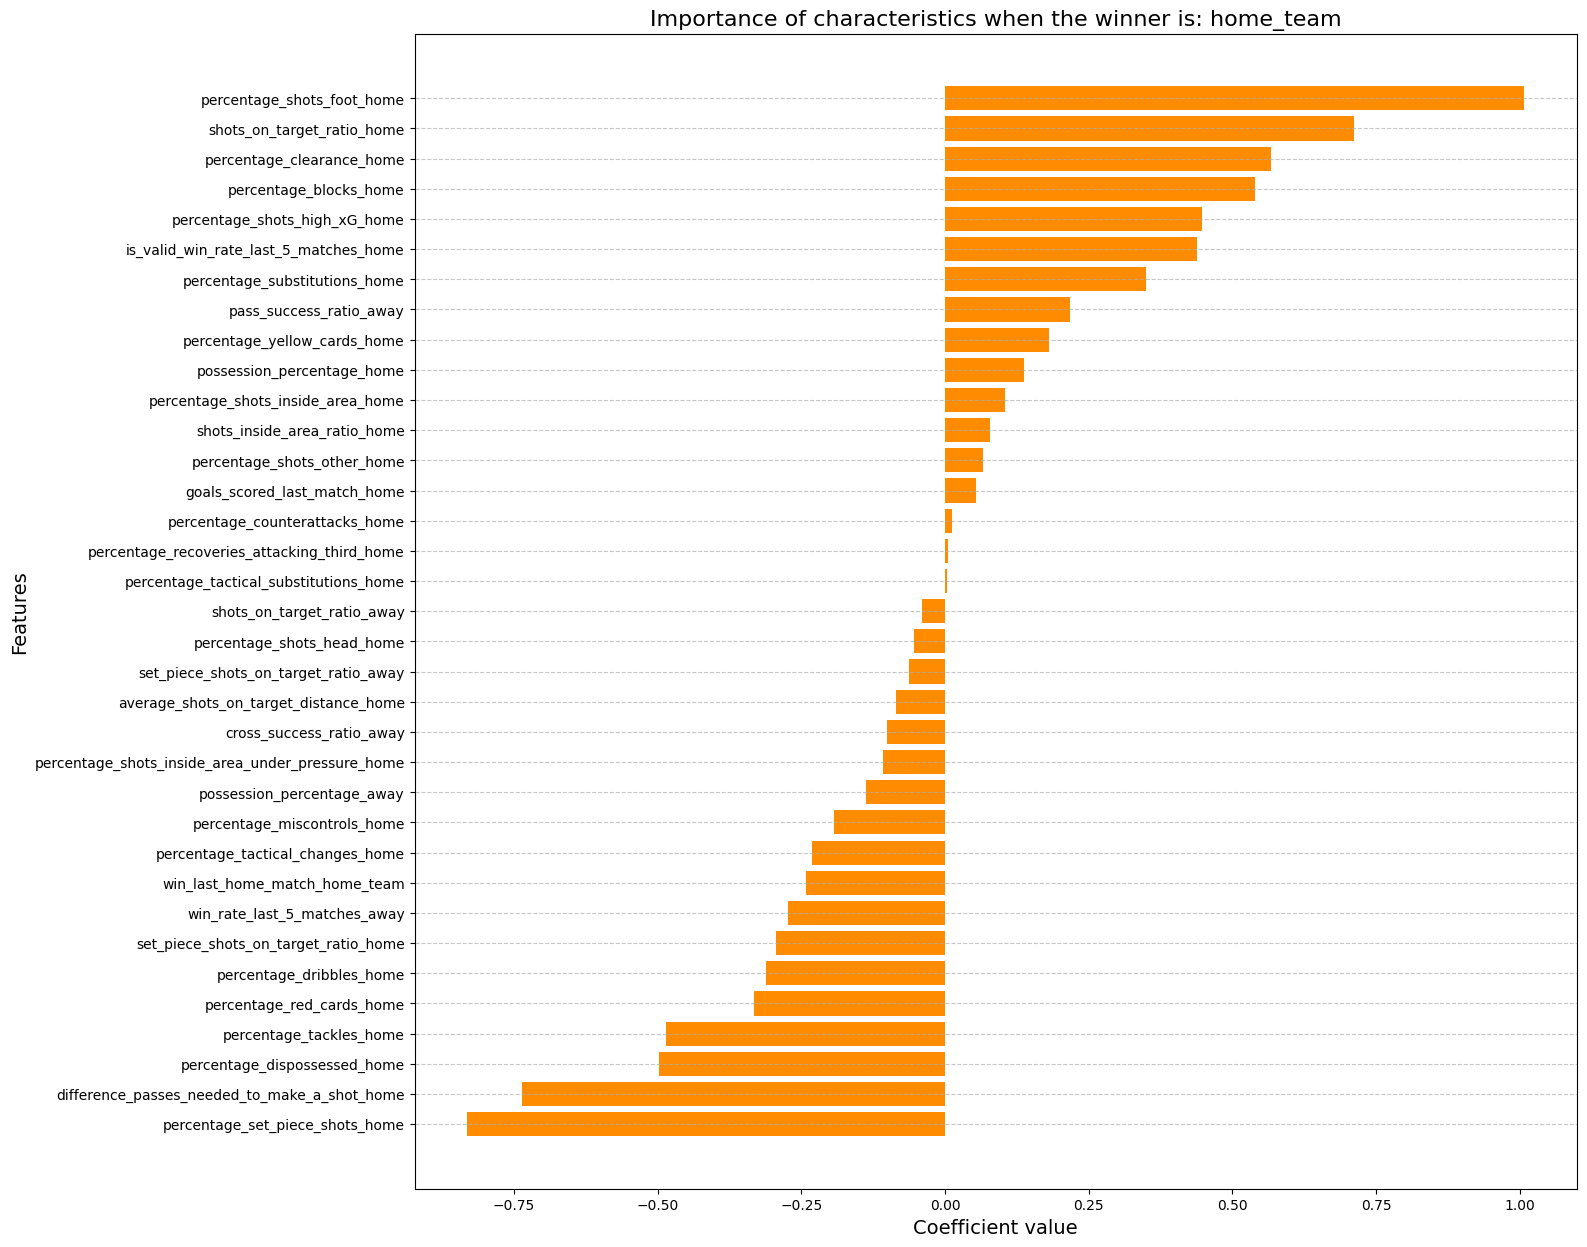

In [4]:
from src.analysis import logistic_regression_global_analysis

logistic_regression_global_analysis(best_model_PL, feature_names_reduced_PL, encoder_PL)

Vamos a analizar estos gráficos:

- **Importancia de características para la victoria del equipo visitante (*away_team*)**: Las características en este gráfico aumentan la probabilidad de que el equipo visitante gane el partido.
    - **Características que favorecen la victoria del equipo visitante**: 📈
        - `shots_on_target_ratio_away`: Un mayor porcentaje de tiros a puerta del equipo visitante incrementa su probabilidad de marcar y ganar el partido.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego aéreo, lo que puede ser más predecible y menos efectivo.
        - `possession_percentage_away`: Un mayor porcentaje de posesión del equipo visitante le permite controlar el ritmo del partido y reducir las oportunidades del equipo local.
        - `percentage_shots_inside_area_under_pressure_home`: Un alto porcentaje de tiros dentro del área bajo presión por parte del equipo local puede significar que sus oportunidades de gol son menos efectivas.
        - `percentage_miscontrols_home`: Un mayor número de errores en el control del balón por parte del equipo local puede derivar en pérdidas que beneficien al visitante.
        - `percentage_red_cards_home`: Si el equipo local recibe más tarjetas rojas que el equipo visitante, juega en inferioridad numérica, lo que favorece al visitante.
        - `cross_success_ratio_away`: Un alto éxito en los centros del equipo visitante puede aumentar su capacidad para generar ocasiones de gol.
        - `percentage_tactical_changes_home`: Un mayor número de cambios tácticos del equipo local puede sugerir problemas en su planteamiento inicial, lo que favorece al visitante.
        - `percentage_dispossessed_home`: Un mayor porcentaje de veces que el equipo local pierde el balón no parece favorecer la victoria visitante.
    - **Características que no favorecen la victoria del equipo visitante**: 📉
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza tiros a puerta desde largas distancias, sus oportunidades de marcar disminuyen.
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera más peligro y dificulta la victoria del visitante.
        - `percentage_clearance_home`: Si el equipo local realiza muchas despejes efectivos, su defensa puede estar resolviendo bien las amenazas del visitante.
        - `percentage_shots_high_xG_home`: Si el equipo local genera muchos tiros con alto xG (expectativa de gol), es más probable que convierta sus oportunidades.
        - `percentage_shots_inside_area_home`: Si el equipo local consigue realizar más tiros dentro del área, sus oportunidades de marcar aumentan.
        - `percentage_counterattacks_home`: Si el equipo local genera más contraataques, puede aprovechar los espacios dejados por el visitante y hacerle daño.
        - `possession_percentage_home`: Un alto porcentaje de posesión del equipo local puede permitirle controlar el juego y reducir las oportunidades del visitante.
        - `percentage_shots_foot_home`, `percentage_shots_other_home`: Un mayor número de tiros con los pies o con partes del cuerpo poco habituales (diferentes a la cabeza o los pies) del equipo local puede indicar que han probado más veces a tirar en el partido que el equipo visitante.
        - `percentage_recoveries_defensive_third_home`: Un alto número de recuperaciones en la zona defensiva del equipo local puede significar que se defiende bien y concede pocas oportunidades al visitante.
        - `goals_scored_last_match_home`: Si el equipo local anotó varios goles en su último partido, es probable que llegue con confianza y en un buen estado de forma.
        - `percentage_duels_won_home`: Un mayor porcentaje de duelos ganados por el equipo local indica que impone su físico en el partido, dificultando el juego del visitante.
        - `goals_scored_last_match_away`: La cantidad de goles anotados por el equipo visitante en su último partido no favorece directamente su victoria en el presente encuentro.
        - `percentage_offsides_home`: Si el equipo local cae en fuera de juego con frecuencia, puede estar atacando más y buscando constantemente superar la defensa del visitante.
        - `percentage_substitutions_home`: Un mayor número de sustituciones del equipo local puede indicar ajustes tácticos que le permitan mejorar su desempeño durante el partido.              
    - **Características que no tienen importancia en la victoria del equipo visitante**:
        - `last_3_matches_form_home`, `last_3_matches_form_away`: La dinámica de los últimos tres partidos de ambos equipos no tiene un impacto claro en la victoria del visitante.
        - `percentage_yellow_cards_home`: La cantidad de tarjetas amarillas recibidas por el equipo local no afecta significativamente la probabilidad de victoria del visitante.
        - `percentage_recoveries_middle_third_home`, `percentage_recoveries_offensive_third_home`: Las recuperaciones del equipo local en distintas zonas a la zona defensiva del campo no parecen influir en la victoria del visitante.
        - `percentage_set_piece_shots_on_target_ratio_away`, `percentage_dribbles_home`: Estas métricas no muestran una correlación clara con la victoria del equipo visitante.
    - **Conclusión**: Para que un equipo visitante tenga una mayor probabilidad de ganar en la Premier League, necesita tener un alto porcentaje de tiros a puerta y aprovechar las oportunidades dentro del área; presionar y dificultar el juego del equipo local, forzándolo a cometer errores en el control y en la circulación del balón; sacar ventaja de la inferioridad numérica del equipo local en caso de expulsiones; mantener una posesión alta y precisión en los pases para controlar el ritmo del partido; y ser efectivo en jugadas a balón parado y en centros. Por otro lado, si el equipo local consigue generar peligro con tiros de alta calidad, mantiene la posesión y logra ser efectivo en la defensa y la recuperación del balón, la victoria del equipo visitante se vuelve menos probable. Finalmente, algunas métricas como la cantidad de tarjetas amarillas o las recuperaciones en el tercio medio y ofensivo no parecen ser determinantes en la probabilidad de victoria del equipo visitante en la Premier League.

- **Importancia de características para el empate (*draw*)**: El empate en un partido suele estar influenciado por un equilibrio en las métricas de ataque y defensa de ambos equipos. Algunas observaciones clave:
    - **Características que favorecen el empate**: 📈
        - `win_last_home_match_home_team`: Si el equipo local ganó su último partido en casa, esto podría indicar estabilidad en su rendimiento y mayor posibilidad de mantener el equilibrio en el marcador.
        - `goals_scored_last_match_away`: Si el equipo visitante viene de anotar goles en su último partido, podría demostrar una capacidad ofensiva suficiente para igualar el marcador en caso de recibir un gol.
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza tiros a puerta desde mayores distancias, sus oportunidades de marcar disminuyen, favoreciendo un resultado más ajustado.
        - `average_shots_on_target_distance_home`: Similar al equipo visitante, si el equipo local dispara desde lejos, sus posibilidades de anotar disminuyen, aumentando la probabilidad de empate.
        - `percentage_tackles_home`: Un equipo local con una cantidad equilibrada de entradas puede generar un partido con menos transiciones rápidas y menos oportunidades de gol.
        - `percentage_duels_won_home`: Si el equipo local gana una cantidad importante de duelos, el partido se vuelve más disputado, reduciendo las opciones de que un equipo domine claramente.
        - `difference_passes_needed_to_make_a_shot_home`: Un alto número de pases requeridos por el equipo local respecto al visitante para generar un disparo puede indicar un juego más pausado y estructurado, lo que reduce la probabilidad de que un equipo rompa la igualdad.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene una alta efectividad en tiros a puerta desde jugadas a balón parado, podría demostrar una capacidad ofensiva suficiente para igualar el marcador en caso de recibir un gol.
        - `percentage_offsides_home`: Un alto número de fueras de juego del equipo local puede indicar que su ataque es más predecible y menos efectivo, favoreciendo un resultado equilibrado.
        - `win_rate_last_5_matches_away`: Un equipo visitante que ha tenido un rendimiento equilibrado en los últimos cinco partidos puede mantener la solidez en el campo, evitando una derrota y favoreciendo el empate.
        - `percentage_set_piece_shots_home`: Si el equipo local tiene más jugadas a balón parado que el equipo visitante pero este no es capaz de convertirlas puede llevar a igualdad en el marcador.
    - **Características que no favorecen el empate**: 📉
        - `dribbles_success_ratio_home`: Un alto número de regates exitosos por parte del equipo local puede significar que ha superado la defensa rival con mayor facilidad, reduciendo la probabilidad de un empate.
        - `tackles_success_ratio_home`: Un equipo local con un alto porcentaje de éxito en sus entradas defensivas puede generar más transiciones rápidas, aumentando la posibilidad de ganar.
        - `shots_inside_area_ratio_home`: Un equipo local con un alto número de tiros dentro del área genera más peligro, aumentando las probabilidades de marcar y ganar el partido.
        - `percentage_recoveries_attacking_third_home`: Un alto número de recuperaciones en el último tercio del campo del equipo local puede indicar una presión ofensiva más efectiva, lo que podría llevarlo a la victoria en lugar de mantener el empate.
        - `percentage_interceptions_won_home`: Si el equipo local gana muchas intercepciones, puede recuperar el balón más rápido y generar oportunidades ofensivas, lo que reduce la probabilidad de que el partido termine igualado.
        - `percentage_blocks_home`: Un equipo local que bloquea muchos disparos podría estar defendiendo bien, pero también permitiendo más intentos de gol del rival, reduciendo la posibilidad de un empate.
        - `percentage_tactical_substitutions_home`: Si el equipo local hace muchas sustituciones tácticas, podría estar ajustando su estrategia para evitar el empate y buscar la victoria.
        - `cross_success_ratio_home`: Si el equipo local tiene un alto éxito en sus centros, puede generar más peligro y aumentar sus oportunidades de victoria.
        - `percentage_yellow_cards_home`: Un alto número de tarjetas amarillas del equipo local puede significar un partido disputado pero sin que ninguno de los equipos logre imponerse claramente.
    - **Características que no tienen importancia en el empate**:
       - `shots_on_target_ratio_home`, `shots_on_target_ratio_away`: La precisión en los tiros a puerta de ambos equipos no parece ser un factor clave para que un partido termine en empate.
        - `possession_percentage_home`, `possession_percentage_away`: La posesión del balón de ambos equipos no tiene un impacto claro en la probabilidad de empate.
        - `percentage_shots_high_xG_home`, `percentage_shots_inside_area_home`, `percentage_shots_foot_home`, `percentage_shots_head_home`: Diferentes tipos de tiros y su calidad no parecen ser determinantes en la probabilidad de empate.
        - `percentage_clearance_home`, `percentage_miscontrols_home`, `percentage_red_cards_home`, `percentage_dribbles_home`, `percentage_counterattacks_home`, `percentage_recoveries_defensive_third_home`, `percentage_shots_inside_area_under_pressure_home`, `percentage_substitutions_home`, `percentage_tactical_changes_home`: Estas métricas no parecen correlacionarse fuertemente con el empate.
    - **Conclusión**: El empate en la Premier League suele darse cuando ambos equipos presentan características equilibradas en términos de táctica, recuperación del balón y falta de efectividad ofensiva. Los factores que más favorecen el empate incluyen: equipos que vienen de buenos resultados recientes sin ser dominantes; baja efectividad ofensiva, con tiros desde fuera del área y poca precisión en jugadas a balón parado; y partidos trabados en el medio campo, con duelos constantes y dificultades para generar ocasiones claras. Por otro lado, si un equipo muestra una alta precisión en centros y tiros a puerta, realiza más cambios tácticos efectivos o domina en ciertas métricas ofensivas como regates y pases dentro del área, la probabilidad de empate disminuye. Finalmente, algunas métricas como la posesión del balón, la cantidad de tarjetas rojas o las recuperaciones en el tercio defensivo no parecen ser determinantes en la probabilidad de empate en la Premier League.

- **Importancia de características para la victoria del equipo local (*home_team*)**: Las características en este gráfico aumentan la probabilidad de que el equipo local gane el partido.
    - **Características que favorecen la victoria del equipo local**: 📈
        - `percentage_shots_foot_home`: Un mayor porcentaje de tiros con el pie por parte del equipo local indica una mayor generación de oportunidades claras, lo que favorece su victoria.
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta tiene más probabilidades de marcar goles y ganar el partido.
        - `percentage_clearance_home`: Si el equipo local realiza despejes efectivos, reduce las oportunidades de ataque del equipo visitante, favoreciendo su victoria.
        - `percentage_blocks_home`: Un equipo local que bloquea tiros rivales impide que el visitante genere ocasiones de gol, contribuyendo a su dominio del partido.
        - `percentage_shots_high_xG_home`: Si el equipo local tiene un alto porcentaje de tiros con una alta expectativa de gol (xG), significa que está generando ocasiones de calidad que pueden traducirse en goles.
        - `percentage_substitutions_home`: Un equipo que realiza más cambios tácticos puede estar mejor adaptando su estrategia durante el partido para mantener la ventaja.
        - `percentage_yellow_cards_home`: Un mayor número de tarjetas amarillas indica un equipo local más agresivo, lo que puede dificultar el juego del equipo visitante.
        - `possession_percentage_home`: Un equipo local con mayor posesión de balón puede controlar mejor el ritmo del partido y generar más oportunidades.
        - `percentage_shots_inside_area_home`: Un equipo local que realiza más tiros dentro del área genera más peligro y aumenta su probabilidad de marcar.
        - `shots_inside_area_ratio_home`: Si el equipo local tiene un alto ratio de tiros dentro del área, indica que está logrando acercarse con facilidad a la portería rival.
        - `percentage_shots_other_home`: Un equipo local que diversifica sus tiros con diferentes tipos de disparos (además de los convencionales con el pie y la cabeza) puede generar más opciones ofensivas.
        - `goals_scored_last_match_home`: Si el equipo local anotó muchos goles en su último partido, puede indicar que tiene confianza y un buen estado de forma.
    - **Características que no favorecen la victoria del equipo local**: 📉
        - `percentage_set_piece_shots_home`: Si el equipo local depende demasiado de los tiros a balón parado, podría tener dificultades para marcar en jugadas de campo abierto.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases para generar un disparo, su ataque es menos eficiente y más predecible.
        - `percentage_dispossessed_home`: Un equipo local que pierde el balón con frecuencia puede ver reducida su capacidad para controlar el partido.
        - `percentage_tackles_home`: Si el equipo local necesita hacer muchas entradas, puede indicar que está perdiendo la batalla en el medio campo y está más enfocado en defender que en atacar.
        - `percentage_red_cards_home`: Si el equipo local recibe tarjetas rojas, pierde jugadores y aumenta el riesgo de ser superado por el equipo visitante.
        - `set_piece_shots_on_target_ratio_home`: Si el equipo local no aprovecha bien sus tiros a balón parado, desaprovecha oportunidades de marcar.
        - `win_rate_last_5_matches_away`: Si el equipo visitante ha tenido una buena racha en sus últimos cinco partidos, puede representar un rival difícil de vencer.
        - `win_last_home_match_home_team`: Aunque ganar el último partido en casa puede ser un indicador de confianza, no siempre garantiza una victoria en el siguiente encuentro.
        - `percentage_tactical_changes_home`: Demasiados cambios tácticos en el equipo local pueden indicar inestabilidad en su planteamiento, lo que puede dificultar su victoria.
        - `percentage_miscontrols_home`: Si el equipo local tiene muchas pérdidas de control del balón, puede perder oportunidades de ataque y dar ventaja al equipo visitante.
        - `possession_percentage_away`: Un equipo visitante con una mayor posesión de balón puede controlar el juego y reducir las oportunidades ofensivas del equipo local.
        - `percentage_shots_inside_area_under_pressure_home`: Si el equipo local genera sus tiros dentro del área bajo presión, puede significar que sus oportunidades no son claras y que la defensa visitante es sólida.
        - `cross_success_ratio_away`: Un equipo visitante con un alto porcentaje de centros exitosos puede generar peligro y aumentar sus oportunidades de anotar.
        - `average_shots_on_target_distance_home`: Si el equipo local realiza tiros desde muy lejos, su probabilidad de marcar se reduce, dificultando su victoria.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante es efectivo en tiros a balón parado, aumenta la posibilidad de que anote, reduciendo la ventaja del equipo local.
        - `percentage_shots_head_home`: Un equipo local que depende excesivamente de los tiros de cabeza puede indicar una menor capacidad para generar ocasiones por otras vías más efectivas.
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta genera más peligro y puede dificultar la victoria del equipo local.
    - **Características que no tienen importancia en la victoria del equipo local**:
        - `shots_inside_area_ratio_away`, `pass_success_ratio_home`, `cross_success_ratio_home`, `tackles_success_ratio_home`, `dribbles_success_ratio_home`: Estas métricas no parecen influir directamente en la victoria del equipo local.
        - `win_rate_last_5_matches_home`, `goals_scored_last_match_away`: Aunque estas métricas pueden indicar el rendimiento pasado, no tienen un impacto directo en la victoria del equipo local en un partido específico.
        - `percentage_interceptions_won_home`, `percentage_duels_won_home`, `percentage_offsides_home`, `percentage_players_off_home`, `percentage_recoveries_defensive_third_home`: Estas métricas no parecen tener una correlación clara con la victoria del equipo local.
    - **Conclusión**: La victoria del equipo local en la Premier League se basa en su capacidad ofensiva, precisión en los tiros y dominio en el área rival. Factores que aumentan su probabilidad de ganar incluyen: mayor generación de oportunidades de calidad, especialmente dentro del área; eficiencia en los tiros, con un alto porcentaje de acierto a puerta; y control del partido a través de la posesión y bloqueos defensivos efectivos. Por otro lado, si el equipo visitante logra ser preciso en sus tiros, generar peligro con centros y mantener una alta posesión del balón, la probabilidad de que el equipo local gane se reduce. Finalmente, métricas como la forma en los últimos partidos, ciertos aspectos defensivos y algunas estadísticas de juego no parecen ser determinantes en la victoria del equipo local en la Premier League.

- **Conclusiones generales**: 
    - *Victoria del equipo visitante*: Es clave que el visitante tenga precisión en los tiros a puerta, controle el partido y aproveche errores del equipo local. La superioridad numérica por expulsiones y un alto éxito en centros aumentan sus posibilidades. Si el equipo local genera más peligro con tiros de calidad y mantiene la posesión, la victoria visitante se vuelve difícil.
    - *Empate*: Se da cuando el partido es equilibrado, con baja efectividad ofensiva y una fuerte disputa en el medio campo. Equipos con estabilidad reciente y que dificultan la creación de ocasiones del rival tienden a igualar el marcador. La precisión en regates, tiros a puerta y cambios tácticos pueden romper este equilibrio.
    - *Victoria del equipo local*: Se basa en la eficiencia ofensiva, con un alto porcentaje de tiros dentro del área y a puerta. Controlar la posesión y realizar bloqueos defensivos efectivos también favorecen su triunfo. Sin embargo, si el visitante domina la posesión, genera peligro en centros o es efectivo en jugadas a balón parado, la victoria local se complica.
    - *Factores no determinantes*: Algunos medidas de forma en los últimos partidos, la cantidad de tarjetas amarillas y algunas métricas defensivas como recuperaciones o intercepciones no parecen influir significativamente en los resultados.

### Estudio local

Ahora comenzamos el análisis de explicabilidad utilizando SHAP. 

El análisis SHAP (SHapley Additive exPlanations) nos permite interpretar el impacto de cada característica en la predicción del modelo. A diferencia de los coeficientes lineales, SHAP captura interacciones entre variables y muestra el impacto individual de cada una en cada predicción. En este documento analizaremos los resultados obtenidos para la predicción de los partidos de la Premier League.

Cada uno de los siguientes gráficos representa la importancia de las variables en la predicción de cada posible resultado:
- Victoria del equipo visitante (away_team).
- Empate (draw).
- Victoria del equipo local (home_team).

**Interpretación de los gráficos SHAP**: Cada punto en el gráfico representa un partido. Los valores en el eje X indican el impacto de una característica específica en la predicción del modelo:
- Valores positivos: Incrementan la probabilidad de que el partido termine con el resultado indicado.
- Valores negativos: Disminuyen la probabilidad del resultado.
- Color: Representa el valor de la característica. Rojo indica valores altos y azul valores bajos.

In [5]:
from src.analysis import compute_shap_values

shap_values_PL = compute_shap_values(best_model_PL, X_train_reduced_PL, X_test_reduced_PL, feature_names_reduced_PL)

Class 0: away_team
Important features (41):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_home', 'dribbles_success_ratio_home', 'possession_percentage_home', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'goals_scored_last_match_home', 'goals_scored_last_match_away', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_interceptions_won_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_miscontrols_home'

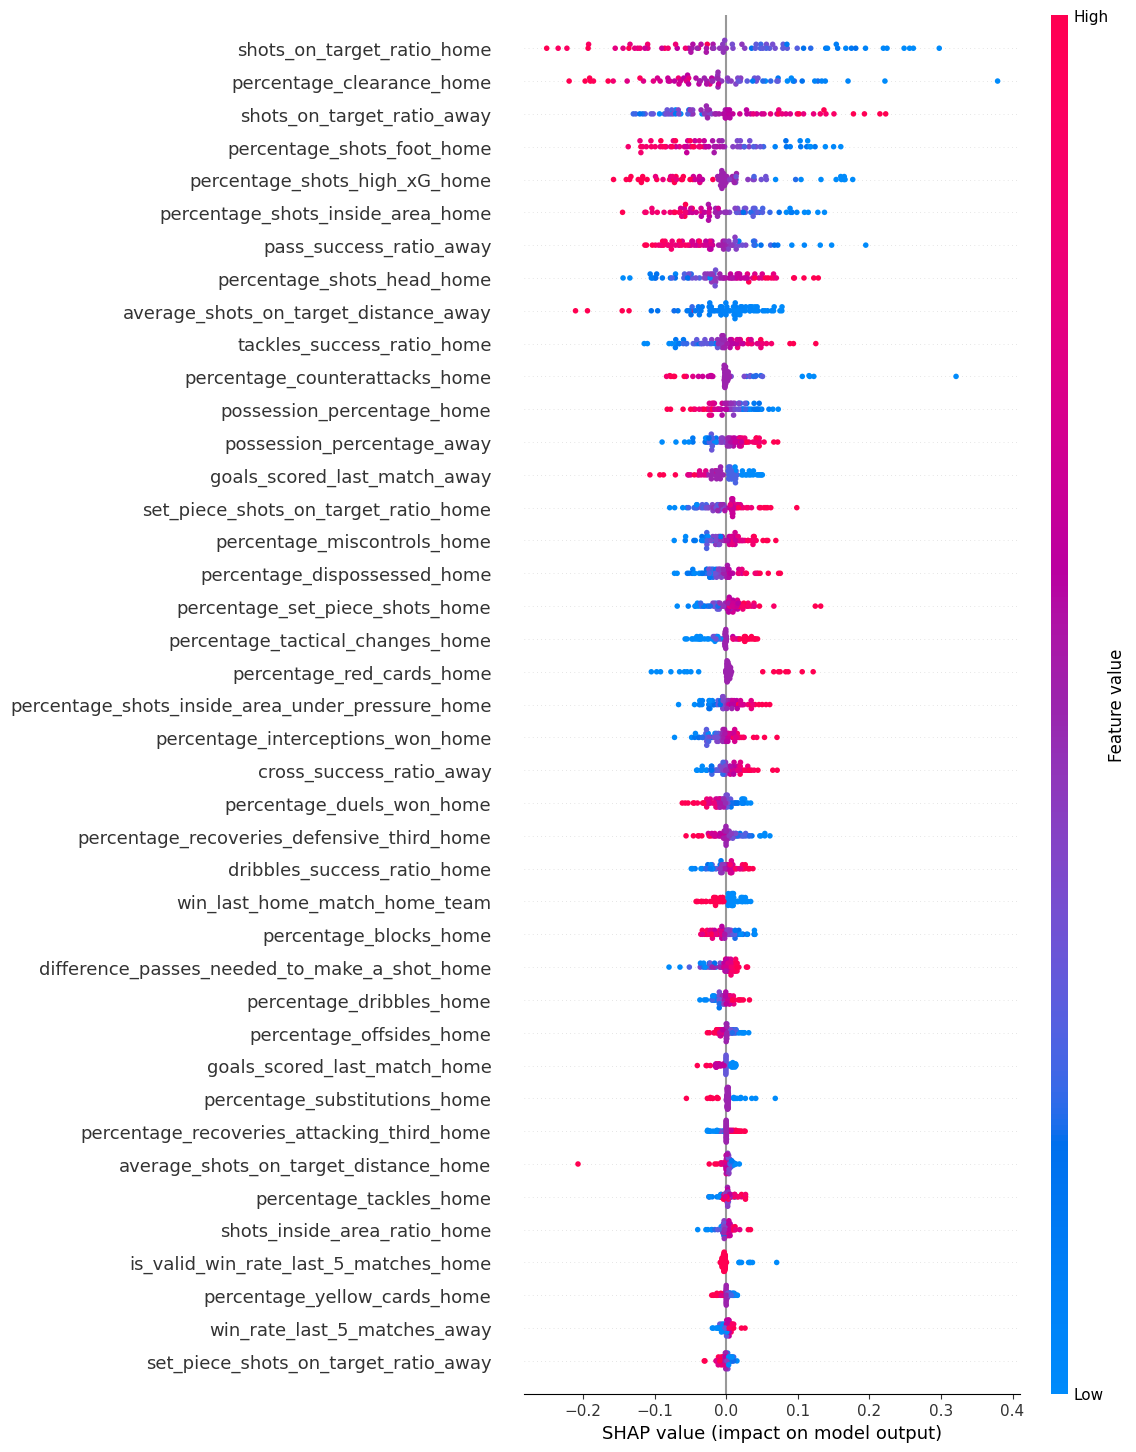

Class 1: draw
Important features (39):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'pass_success_ratio_away', 'tackles_success_ratio_home', 'dribbles_success_ratio_home', 'possession_percentage_home', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'goals_scored_last_match_away', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_interceptions_won_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_miscontrols_home', 'percentage_yellow_cards_home', 'percentage_red_cards_home', 'p

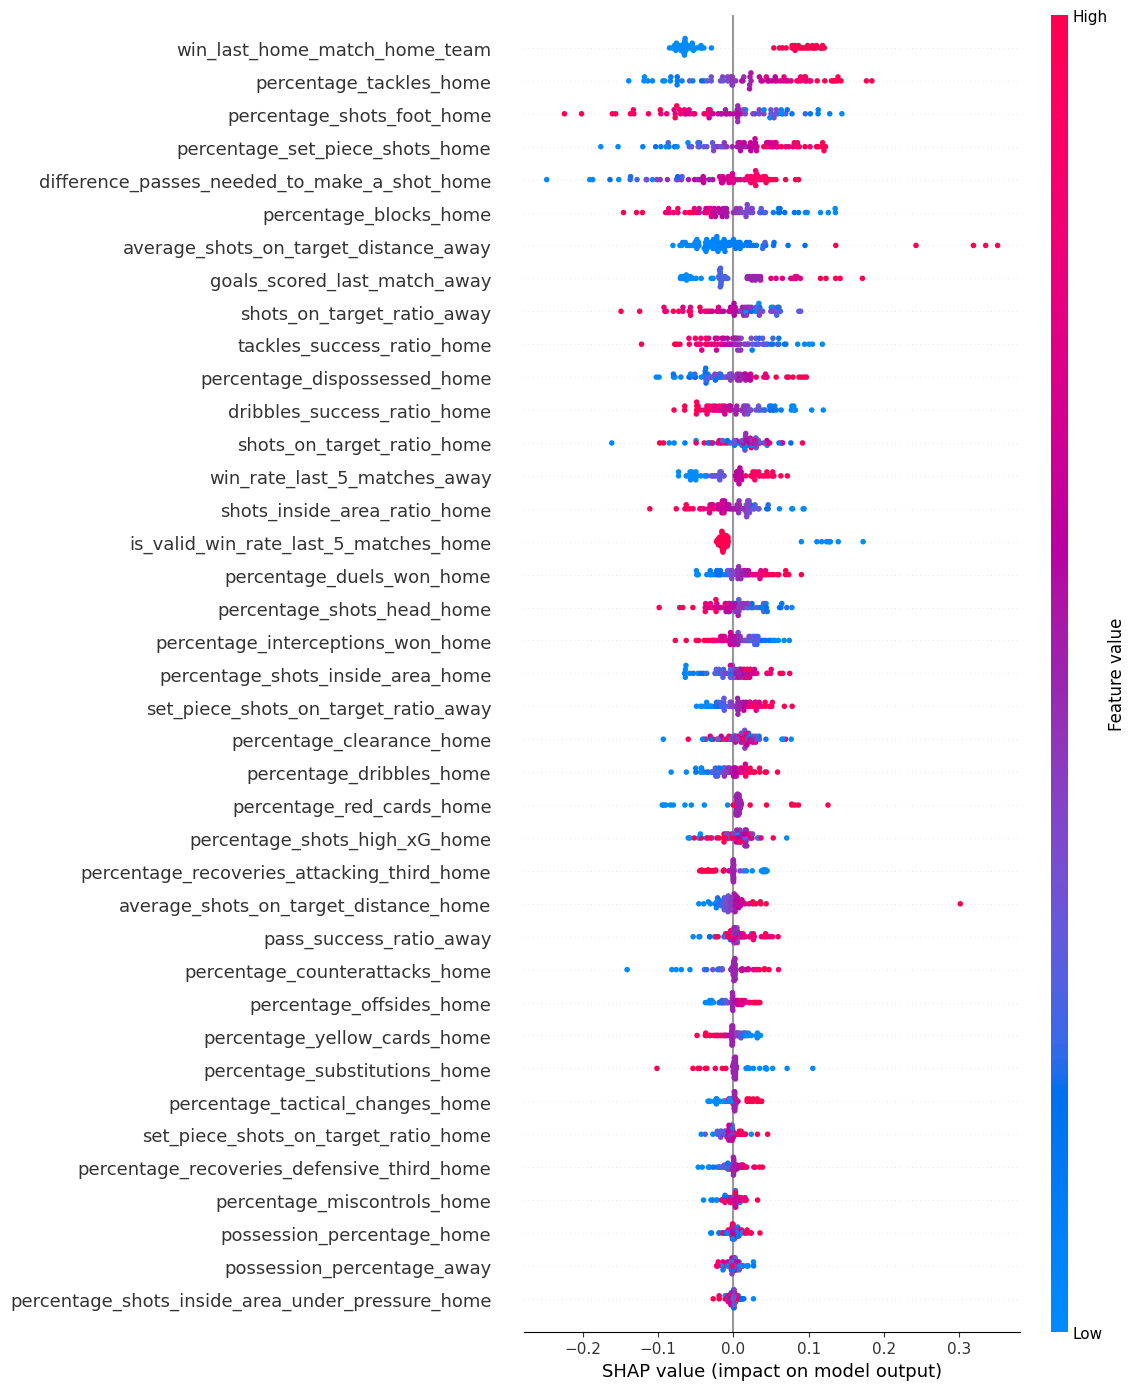

Class 2: home_team
Important features (41):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_home', 'dribbles_success_ratio_home', 'possession_percentage_home', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'goals_scored_last_match_home', 'goals_scored_last_match_away', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_interceptions_won_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_miscontrols_home'

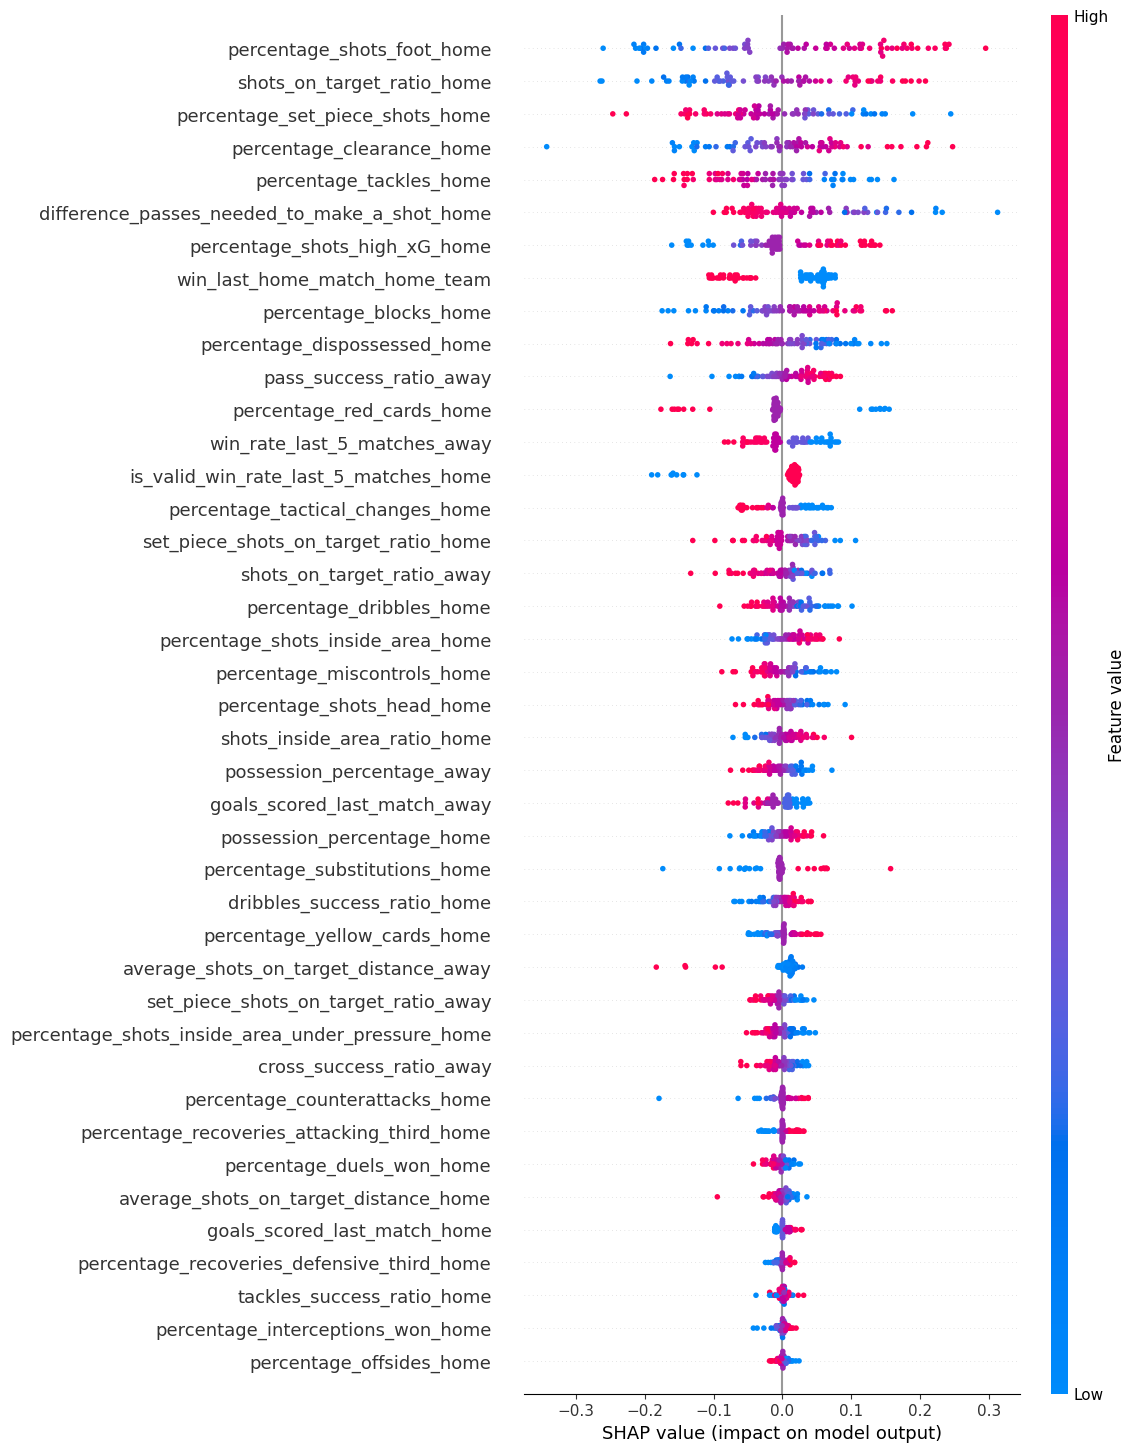

In [6]:
from src.analysis import plot_shap_summary

plot_shap_summary(shap_values_PL, feature_names_reduced_PL, encoder_PL)

Vamos a analizar cada uno de los gráficos:

- **Victoria del equipo visitante**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de victoria del equipo visitante en la Premier League.
    - **Características que favorecen la victoria del equipo visitante**: 📈
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta tiene más probabilidades de marcar y ganar.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego aéreo, lo que puede ser más predecible y menos efectivo.
        - `possession_percentage_away`: Controlar la posesión fuera de casa permite al equipo visitante imponer su ritmo y dificultar el juego del equipo local.
        - `percentage_miscontrols_home` y `percentage_dispossessed_home`: Más errores en el control del balón y pérdidas de posesión por parte del equipo local pueden derivar en oportunidades de contraataque para el equipo visitante.
        - `percentage_tactical_changes_home`: Un mayor número de cambios tácticos del equipo local puede sugerir problemas en su planteamiento inicial, lo que favorece al visitante.
        - `percentage_red_cards_home`: Si el equipo local recibe más tarjetas rojas, pierde jugadores y puede ver afectada su estructura defensiva.
        - `percentage_shots_inside_area_under_pressure_home`: Un alto porcentaje de tiros bajo presión por parte del equipo local indica que está siendo incómodo en ataque, lo que favorece a la defensa visitante.
        - `cross_success_ratio_away`: Una mayor precisión en los pases y centros del equipo visitante aumenta su capacidad para generar ocasiones de gol.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases para generar un tiro, significa que su ataque es menos eficiente, lo que favorece al visitante.
        - `win_rate_last_5_matches_away`: Si el equipo visitante viene con una buena dinámica en los últimos cinco partidos, tiene más opciones de ganar el partido que nos incumbe.
        - `percentage_duels_won_home`: Un equipo local que gana menos que el equipo visiatnte puede hacer que el equipo visitante controle más el juego y gane el partido.
        - `win_last_home_match_home_team`: Si el equipo local ganó su último partido en casa, no es necesariamente un factor negativo para el visitante, ya que puede hacer que el equipo local se confíe y deje espacios.
    - **Características que no favorecen la victoria del equipo visitante**: 📉
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera peligro y reduce las posibilidades de que el equipo visitante gane.
        - `percentage_clearance_home`: Si el equipo local realiza despejes efectivos, reduce las oportunidades de ataque del equipo visitante, favoreciendo su victoria.
        - `percentage_shots_foot_home`: Un mayor porcentaje de tiros con el pie por parte del equipo local indica una mayor generación de oportunidades claras, lo que favorece su victoria.
        - `percentage_shots_high_xG_home`: Si el equipo local consigue disparos con alta expectativa de gol (xG), la probabilidad de que anote y complique la victoria visitante aumenta.
        - `percentage_shots_inside_area_home`: Si el equipo local tiene un alto número de tiros dentro del área, está generando más peligro y puede hacer más difícil la victoria visitante.
        - `average_shots_on_target_distance_away`: Un valor muy alto en la distancia media de los tiros del equipo visitante hace que tengas menos posibilidades de marcar, perjudicando a la victoria del equipo visitante.
        - `percentage_counterattacks_home`: Si el equipo local genera más contraataques, puede aprovechar los espacios dejados por el visitante y hacerle daño.
        - `possession_percentage_away`: Controlar la posesión en casa permite al equipo local imponer su ritmo y dificultar el juego del equipo visitante.
        - `percentage_recoveries_defensive_third_home`: Un equipo local que recupera muchos balones en su zona defensiva impide que el equipo visitante pueda finalizar sus ataques con claridad.
        - `win_last_home_match_home_team`: Un equipo local que viene de ganar su último partido hace que el equipo visitante tenga más complicado ganarle el partido.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, está reduciendo la efectividad ofensiva del equipo visitante y dificultando sus opciones de anotar.
        - `goals_scored_last_match_home`: Si el equipo local anotó varios goles en su último partido, puede llegar con confianza y efectividad, complicando el triunfo visitante.
    - **Conclusión**: Para que un equipo visitante logre la victoria, necesita ser efectivo en ataque y aprovechar las debilidades del rival. Un alto porcentaje de tiros a puerta, especialmente desde dentro del área, junto con una presión eficaz sobre los pases en el área local, aumentan sus probabilidades de éxito. Además, errores clave del equipo local, como pérdidas de balón, imprecisiones en los pases y una dependencia excesiva del juego aéreo, benefician al visitante. La capacidad del equipo visitante para realizar centros precisos y mantener una circulación fluida del balón también juega un papel fundamental. Sin embargo, si el equipo local es agresivo en ataque, con un elevado número de tiros de alta calidad (xG) y éxito en los regates, la victoria visitante se complica. Elementos como la forma reciente de los equipos, las tarjetas amarillas y las recuperaciones defensivas no parecen ser determinantes en este resultado.

- **Empate**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de empate en un partido en la Premier League. El empate en un partido se ve influenciado por el equilibrio entre ambos equipos en aspectos ofensivos, defensivos y de control del juego.
    - **Características que favorecen el empate**: 📈
        - `percentage_tackles_home`: Un equipo local con una cantidad equilibrada de entradas puede generar un partido con menos transiciones rápidas y menos oportunidades de gol.
        - `difference_passes_needed_to_make_a_shot_home`: Un equipo local que requiere más pases para generar disparos puede estar optando por un estilo de juego más pausado y estructurado, lo que reduce la posibilidad de que uno de los dos equipos rompa el empate.
        - `average_shots_on_target_distance_home` y `average_shots_on_target_distance_away`: Ambos equipos disparando desde distancias más lejanas pueden significar que generan menos peligro real, aumentando la posibilidad de un partido cerrado.
        - `win_last_home_match_home_team`: Si el equipo local ganó su último partido en casa, puede reflejar estabilidad en su rendimiento, lo que reduce la probabilidad de una derrota.
        - `goals_scored_last_match_away`: Si el equipo visitante ha anotado recientemente, es más probable que tenga capacidad ofensiva suficiente para igualar un marcador adverso.
        - `percentage_set_piece_shots_home`: Si el equipo local tiene una cantidad considerable de tiros desde jugadas a balón parado respecto al visitante pero no los convierte en goles, esto favorece que el marcador se mantenga igualado.
        - `win_rate_last_5_matches_away`: Un equipo visitante con una racha de resultados equilibrada en los últimos cinco partidos es menos propenso a perder.
        - `percentage_duels_won_home`: Si el equipo local gana más duelos, el partido puede volverse más disputado, lo que evita que uno de los dos equipos se imponga con claridad.
        - `percentage_shots_inside_area_home`: Un equipo local que genera tiros dentro del área sin marcar puede indicar dificultades para finalizar sus oportunidades, contribuyendo a un empate.
        - `set_piece_shots_on_target_ratio_away`: Un equipo visitante con precisión en jugadas a balón parado puede igualar el marcador si el equipo local se adelanta.
        - `percentage_tactical_changes_home`: Un equipo local que hace más cambios tácticos que el visitante debido a que se esta viendo sobrepasado pero que es capaz de, con estos cambios, cambiar la dinámica del partido, favorece el empate.
    - **Características que no favorecen el empate**: 📉
        - `percentage_shots_foot_home`: Un mayor porcentaje de tiros con el pie por parte del equipo local indica una mayor generación de oportunidades claras, lo que favorece su victoria.
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta tiene más probabilidades de marcar y ganar.
        - `tackles_success_ratio_home`: Un equipo local con un alto porcentaje de éxito en sus entradas defensivas puede generar más transiciones rápidas, aumentando la posibilidad de ganar.
        - `dribbles_success_ratio_home`: Un equipo local que supera con éxito a sus rivales en regates puede generar más peligro y romper el equilibrio del partido.
        - `shots_inside_area_ratio_home`: Un alto porcentaje de tiros dentro del área del equipo local implica que está generando más oportunidades claras de gol y aumentando la posibilidad de ganar.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego aéreo, lo que puede ser más predecible y menos efectivo, favoreciendo de esta manera la victoria del equipo visitante.
        - `percentage_interceptions_won_home`: Si el equipo local tiene un alto porcentaje de intercepciones ganadas respecto al equipo visitante, puede significar que el local no esta dando tregua ninguna al equipo visitante y que va a llevarse la victoria en el partido.
        - `percentage_recoveries_attacking_third_home`: Si el equipo local recupera balones en la zona de ataque con frecuencia, puede generar más ocasiones de gol, reduciendo la probabilidad de empate.
        - `percentage_substitutions_home`: Si el equipo local realiza muchas sustituciones tácticas, podría estar buscando ajustes ofensivos para romper el empate y ganar el partido.
    - **Conclusión**: El empate suele ocurrir cuando el partido es equilibrado en términos de posesión, efectividad en ataque y presión defensiva. Equipos que manejan bien la posesión, que presentan solidez defensiva y que evitan conceder oportunidades claras al rival tienden a protagonizar más empates. Recuperaciones en el medio campo y presión tras pérdida dificultan la fluidez del juego, lo que impide que un equipo imponga su dominio. Además, si el equipo visitante tiene un buen rendimiento reciente, es menos probable que pierda, favoreciendo un resultado igualado. Sin embargo, cuando uno de los equipos demuestra superioridad en regates, éxito en jugadas a balón parado o una mayor precisión en pases clave, la probabilidad de empate disminuye. Factores como la cantidad de tarjetas amarillas, las recuperaciones en zonas defensivas y ciertos aspectos de rendimiento no parecen ser influyentes en el resultado final.

- **Victoria del equipo local**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de victoria del equipo local en la Premier League.
    - **Características que favorecen la victoria del equipo local**: 📈
        - `percentage_shots_foot_home`, `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros con el pie y a puerta tiene más probabilidades de marcar goles y ganar.
        - `percentage_clearance_home`: Si el equipo local realiza despejes efectivos, reduce las oportunidades de ataque del equipo visitante, favoreciendo su victoria.
        - `percentage_shots_high_xG_home`: Si los tiros del equipo local tienen un alto expected goals (xG), son más peligrosos y pueden traducirse en goles.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, está reduciendo la efectividad ofensiva del equipo visitante y dificultando sus opciones de anotar.
        - `percentage_shots_inside_area_home`, `shots_inside_area_ratio_home`: Si el equipo local tiene un alto número de tiros dentro del área respecto al total de partido (ambos equipos) y respecto a los tiros que hace en todo el partido, está generando más peligro.
        - `possession_percentage_home`, `percentage_substitutions_home`: Controlar la posesión y realizar sustituciones efectivas permite al equipo local imponer su juego y mantener la ventaja.
        - `dribbles_sucess_ratio_home`: Un equipo local con un ratio alto de regates completados significa que esta siendo capaz de generar peligro y superioridades en los ataques, aumentando así sus posibilidades de crear peligro.
        - `percentage_recoveries_attacking_third_home`, `percentage_interceptions_won_home`: Un equipo local que recupera el balón en zonas ofensivas y gana más intercepciones puede presionar mejor y generar más ocasiones.
        - `goals_scored_last_match_home`: Un equipo local que viene de marcar varios goles puede venir en un buen pico de rendimiento al partido actual.
    - **Características que no favorecen la victoria del equipo local**: 📉
        - `percentage_set_piece_shots_home`: Si el equipo local tiene un alto porcentaje de tiros desde jugadas a balón parado respecto al visitante puede significar que no esta consiguiendo generar peligro desde jugadas elaboradas y que solo lo intenta desde jugadas a balón parado reduciendo sus posibilidades de ganar el partido.
        - `percentage_tackles_home`: Un equipo local que hace más tackles que el equipo visitantes puede significar que esta defendiendo más que el equipo visitante y, por tanto, esta generando menos ocasiones de gol.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases para generar un disparo, su ataque es menos eficiente.
        - `percentage_dispossessed_home`, `percentage_miscontrols_home`: Un equipo local que pierde más el balón o comete errores en el control puede facilitar ataques del rival.
        - `percentage_red_cards_home`: Un equipo local que recibe más tarjetas podría quedarse en inferioridad numérica o desestabilizarse.
        - `win_rate_last_5_matches_away`: Un equipo visitante que viene con una buena dinámica en los últimos cinco partidos puede hacer que el equipo local no gané el partido.
        - `shots_on_target_ratio_away`, `set_piece_shots_on_target_away`: Si el equipo visitante tiene un alto porcentaje de tiros a puerta, genera más peligro y reduce las opciones del equipo local.
        - `percentage_tactical_changes_home`: Si el equipo local tiene que hacer más cambios tácticos que el equipo visitante puede deberse a que esta viéndose superado en varias ocasiones por el equipo visitante.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego aéreo, lo que puede ser más predecible y menos efectivo.
        - `possession_percentage_away`: Controlar la posesión fuera de casa permite al equipo visitante imponer su ritmo y dificultar el juego del equipo local.
        - `goals_scored_last_match_away`: Un equipo visitante que viene de marcar varios goles puede venir en un buen pico de rendimiento al partido actual.
        - `percentage_shots_inside_area_under_pressure_home`: Un alto porcentaje de tiros dentro del área bajo presión por parte del equipo local puede significar que sus oportunidades de gol son menos efectivas.
    - **Conclusión**: Un equipo local aumenta sus probabilidades de victoria cuando es ofensivamente eficiente y logra generar ocasiones claras dentro del área rival. Un alto porcentaje de tiros a puerta y la constancia en su producción ofensiva a lo largo de los partidos son factores clave. Además, mantener el control del partido mediante la posesión y realizar sustituciones estratégicas permite optimizar su rendimiento. Sin embargo, si el equipo visitante demuestra precisión en ataque y con altos valores en tiros a puerta, la victoria local se ve amenazada. También influyen negativamente las pérdidas de balón, la incapacidad para concretar ataques y la falta de contundencia defensiva. Aspectos como la forma reciente del equipo visitante o ciertas métricas defensivas específicas no parecen tener una relación clara con la victoria del equipo local.

- **Conclusiones generales**:
    - *Victoria del equipo visitante*: Un equipo visitante aumenta sus posibilidades de victoria cuando es eficiente en ataque y aprovecha las debilidades del rival. Un alto porcentaje de tiros a puerta, especialmente desde dentro del área, junto con una presión efectiva sobre los pases en el área local, son factores clave. Además, errores del equipo local, como pérdidas de balón y dependencia excesiva del juego aéreo, favorecen al visitante. También son importantes la precisión en los centros y el éxito en la circulación del balón. Sin embargo, si el equipo local genera muchas ocasiones de alta calidad (xG), mantiene la posesión y es preciso en sus regates, la victoria del visitante se complica.
    - *Empate*: Los empates suelen darse en partidos equilibrados, donde ninguno de los equipos logra imponerse con claridad. La posesión distribuida, la presión tras pérdida y las recuperaciones en el medio campo dificultan el dominio de un solo equipo. Un equipo visitante con buen rendimiento reciente es menos propenso a perder, lo que favorece un empate. Sin embargo, si uno de los equipos tiene mayor precisión en jugadas a balón parado, en regates o en la creación de ocasiones peligrosas, la probabilidad de empate disminuye.
    - *Victoria del equipo local*: La victoria del equipo local está impulsada por su capacidad para generar peligro en el área rival con un alto porcentaje de tiros a puerta y efectividad en jugadas a balón parado. Un equipo que mantiene la posesión, realiza sustituciones estratégicas y controla el ritmo del partido tiene más probabilidades de ganar. Sin embargo, las pérdidas de balón, la falta de contundencia en ataque y la precisión del equipo visitante en tiros a puerta pueden reducir la ventaja del equipo local.
    - *Factores no determinantes*: Algunos factores no parecen influir de manera significativa en el resultado del partido. Métricas como la cantidad de tarjetas amarillas, las recuperaciones defensivas y algunos cambios tácticos no tienen un impacto directo en la victoria de un equipo o en la probabilidad de empate. En general, la eficiencia ofensiva y la capacidad para minimizar errores son los principales determinantes del resultado de un partido.